<a href="https://colab.research.google.com/github/ujjwalbb30/Azure_Nanodegree_AutoML_Classification/blob/master/python_notebooks/90_days_data_drought_or_not_stacking_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cal_90d_agg = pd.read_csv('drought dataset/ninety_days_aggregated_data_ca_drought.csv')
cal_90d_agg = cal_90d_agg.drop(columns=['Unnamed: 0'])

In [ ]:
cal_90d_agg.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,6001.0,0.196000,100.487000,5.158000,7.692000,3.782000,3.810000,13.969000,3.687000,10.283000,7.392000,2.666000,4.207000,1.488000,2.719000,4.001000,5.938000,2.173000,3.766000,0.6079
1,6001.0,1.709412,100.257059,5.701765,8.592941,5.245294,5.262941,14.011176,4.871765,9.138824,8.114706,2.854706,4.770588,1.411765,3.357647,4.334118,6.690000,2.225294,4.465294,0.5036
2,6001.0,5.068333,100.105833,6.274583,9.290833,6.589167,6.601667,14.182917,5.894167,8.288750,8.776250,2.808750,4.680000,1.409583,3.270417,4.319583,6.540833,2.277500,4.263333,0.0000
3,6001.0,4.312581,100.076129,6.227097,9.242903,6.543226,6.553871,14.189677,5.745484,8.443871,8.753548,2.783871,4.532903,1.407419,3.124839,4.286129,6.458065,2.277419,4.180968,0.0000
4,6001.0,3.762632,100.067105,6.358947,9.557368,6.895263,6.903947,14.776316,5.984211,8.791579,8.990000,2.743158,4.506579,1.361316,3.144474,4.222368,6.416842,2.210263,4.207105,0.0000


In [ ]:
X = cal_90d_agg.drop(columns = ['fips','score'])
X.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,0.196000,100.487000,5.158000,7.692000,3.782000,3.810000,13.969000,3.687000,10.283000,7.392000,2.666000,4.207000,1.488000,2.719000,4.001000,5.938000,2.173000,3.766000
1,1.709412,100.257059,5.701765,8.592941,5.245294,5.262941,14.011176,4.871765,9.138824,8.114706,2.854706,4.770588,1.411765,3.357647,4.334118,6.690000,2.225294,4.465294
2,5.068333,100.105833,6.274583,9.290833,6.589167,6.601667,14.182917,5.894167,8.288750,8.776250,2.808750,4.680000,1.409583,3.270417,4.319583,6.540833,2.277500,4.263333
3,4.312581,100.076129,6.227097,9.242903,6.543226,6.553871,14.189677,5.745484,8.443871,8.753548,2.783871,4.532903,1.407419,3.124839,4.286129,6.458065,2.277419,4.180968
4,3.762632,100.067105,6.358947,9.557368,6.895263,6.903947,14.776316,5.984211,8.791579,8.990000,2.743158,4.506579,1.361316,3.144474,4.222368,6.416842,2.210263,4.207105


In [ ]:
y, y_f, y_c = cal_90d_agg['score'].round(), cal_90d_agg['score'].apply(np.floor), cal_90d_agg['score'].apply(np.ceil)
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: score, dtype: float64

In [ ]:
print(y.value_counts())
print(y_f.value_counts())
print(y_c.value_counts())

0.0    27785
1.0    10371
2.0     9985
3.0     7722
4.0     3911
5.0     3794
Name: score, dtype: int64
0.0    31026
1.0    10637
2.0     9723
3.0     6167
4.0     3808
5.0     2207
Name: score, dtype: int64
0.0    23215
1.0    11261
2.0    10427
3.0     9533
5.0     4798
4.0     4334
Name: score, dtype: int64


In [ ]:
# y_l = []
# for i in y:
#     if i == 0:
#         y_l.append(0)
#     else:
#         y_l.append(1)
# print(y_l)
# y_df = pd.Series(y_l)
# print(y_df.value_counts())

In [ ]:
# ind = list(np.arange(len(y)))
# print(ind)

In [ ]:
# cols = ['PDSI_0','PDSI_1','PDSI_2','PDSI_3','PDSI_4','PDSI_5']
# y_df = pd.DataFrame(columns=cols, index=ind)
# counter = 0
# for i in y:
#     if i == 0.0:
#         lab = [1,0,0,0,0,0]
#     elif i == 1.0:
#         lab = [0,1,0,0,0,0]
#     elif i == 2.0:
#         lab = [0,1,1,0,0,0]
#     elif i == 3.0:
#         lab = [0,1,1,1,0,0]
#     elif i == 4.0:
#         lab = [0,1,1,1,1,0]
#     elif i == 5.0:
#         lab = [0,1,1,1,1,1]
#     y_df.loc[counter] = lab
#     counter = counter + 1
# print(y_df)

In [ ]:
y_df = pd.get_dummies(y,prefix='PDSI')
print(y_df.head())
print(y_df['PDSI_0.0'].value_counts())

   PDSI_0.0  PDSI_1.0  PDSI_2.0  PDSI_3.0  PDSI_4.0  PDSI_5.0
0         0         1         0         0         0         0
1         0         1         0         0         0         0
2         1         0         0         0         0         0
3         1         0         0         0         0         0
4         1         0         0         0         0         0
0    35783
1    27785
Name: PDSI_0.0, dtype: int64


In [ ]:
# y_l.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_norm = pd.DataFrame(MinMaxScaler().fit_transform(X),columns=X.columns)
X_norm

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,0.012368,0.925852,0.363263,0.343546,0.597658,0.591292,0.336442,0.400992,0.427046,0.366207,0.201716,0.286604,0.211681,0.336436,0.258895,0.319971,0.256376,0.358597
1,0.107869,0.917340,0.424361,0.365590,0.651653,0.645891,0.337408,0.431559,0.371745,0.381523,0.233060,0.365411,0.197743,0.490780,0.308030,0.418415,0.264373,0.524618
2,0.319828,0.911741,0.488723,0.382665,0.701241,0.696198,0.341340,0.457937,0.330659,0.395543,0.225427,0.352744,0.197344,0.469699,0.305886,0.398887,0.272356,0.476670
3,0.272138,0.910642,0.483388,0.381493,0.699545,0.694401,0.341495,0.454101,0.338157,0.395062,0.221294,0.332175,0.196948,0.434517,0.300952,0.388052,0.272343,0.457115
4,0.237434,0.910308,0.498203,0.389187,0.712535,0.707557,0.354926,0.460260,0.354962,0.400073,0.214532,0.328494,0.188519,0.439262,0.291547,0.382656,0.262074,0.463321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63563,0.036978,0.752243,0.229541,0.570981,0.422350,0.432232,0.594077,0.591922,0.613204,0.550611,0.194814,0.237151,0.134139,0.353488,0.298835,0.402851,0.173460,0.637424
63564,0.066875,0.753308,0.231064,0.541313,0.424469,0.443593,0.561583,0.566311,0.592572,0.525185,0.198154,0.244811,0.132169,0.369250,0.308176,0.417425,0.173120,0.664410
63565,0.086031,0.755348,0.218055,0.512183,0.413030,0.441259,0.530173,0.540875,0.573921,0.496615,0.190403,0.238643,0.120284,0.374271,0.297868,0.416320,0.153326,0.693137
63566,0.107703,0.756068,0.207918,0.477627,0.404125,0.440892,0.493229,0.510333,0.553160,0.465693,0.193559,0.242869,0.122255,0.378944,0.304686,0.421920,0.159222,0.694113


In [ ]:
import matplotlib.pyplot as plt

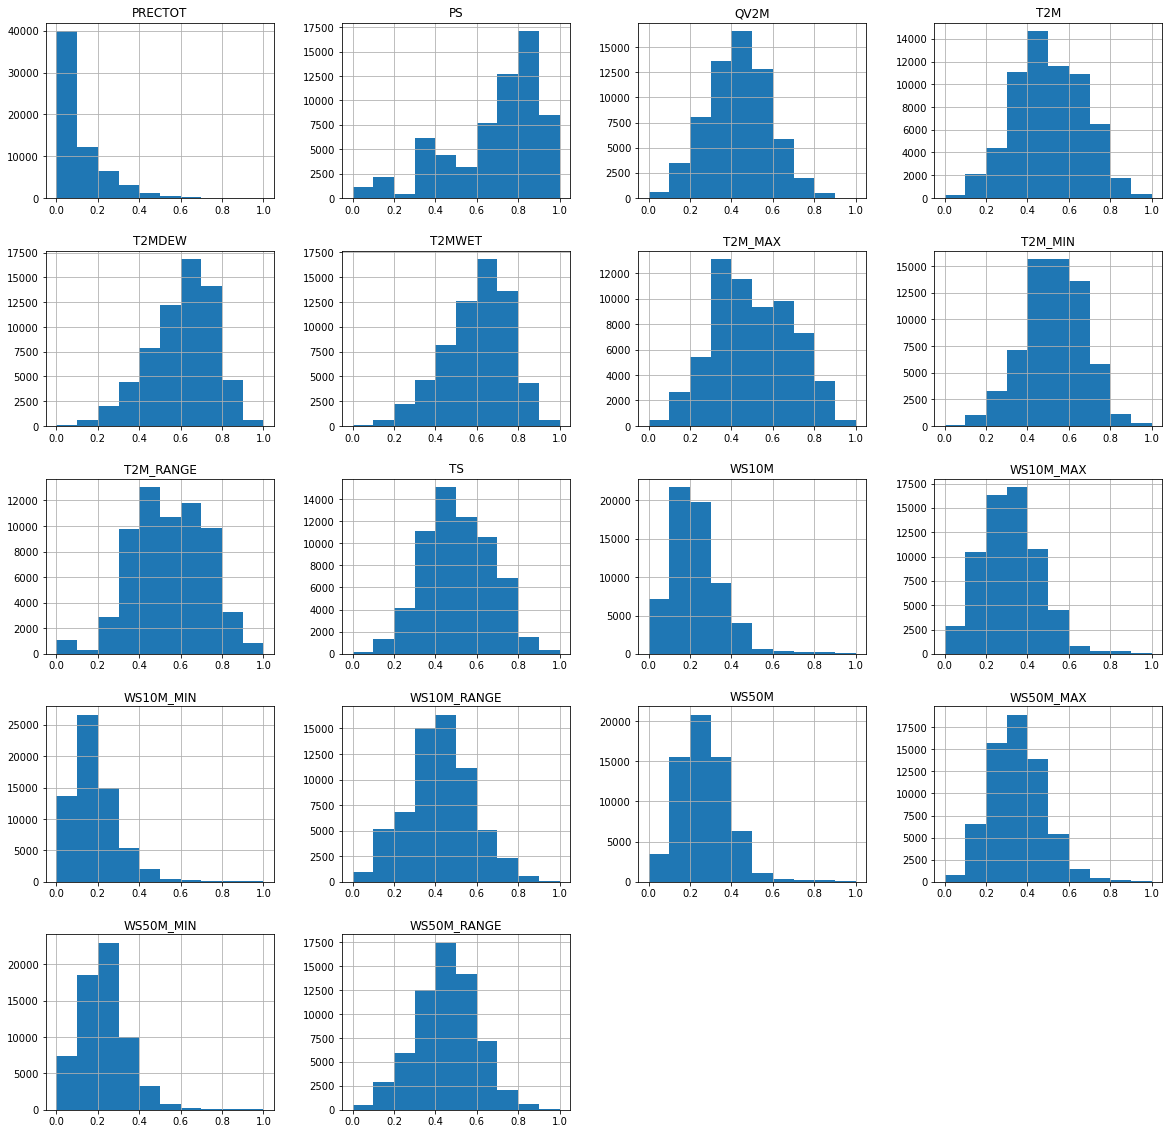

In [ ]:
X_norm.hist(figsize=(20,20))
plt.show()

In [ ]:
X_f = X_norm.to_numpy()
print(X_f)
# y_f = y_df.to_numpy()
# print(y_f)
# y_f = y_df.to_numpy()
# print(y_f)
y_f0 = y_df['PDSI_0.0'].to_numpy()
print(y_f0)
y_f1 = y_df['PDSI_1.0'].to_numpy()
print(y_f1)
y_f2 = y_df['PDSI_2.0'].to_numpy()
print(y_f2)
y_f3 = y_df['PDSI_3.0'].to_numpy()
print(y_f3)
y_f4 = y_df['PDSI_4.0'].to_numpy()
print(y_f4)
y_f5 = y_df['PDSI_5.0'].to_numpy()
print(y_f5)

[[0.01236823 0.92585174 0.36326296 ... 0.31997091 0.25637584 0.35859725]
 [0.10786934 0.91733964 0.42436088 ... 0.41841455 0.26437256 0.52461789]
 [0.31982801 0.91174148 0.48872333 ... 0.39888727 0.27235579 0.47667003]
 ...
 [0.08603069 0.75534816 0.21805516 ... 0.41632    0.15332597 0.69313678]
 [0.10770313 0.75606797 0.2079177  ... 0.42192    0.15922182 0.69411281]
 [0.11952919 0.75713213 0.21594207 ... 0.43477818 0.16932271 0.70172348]]
[0 0 1 ... 0 0 0]
[1 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 1 1 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
from numpy import mean
from numpy import std

In [ ]:
# Split the train and test dataset
from sklearn.model_selection import train_test_split

In [ ]:
xtrain , xtest , ytrain, ytest = train_test_split(X_f,y_f0, random_state = 42, test_size = 0.30, shuffle = True)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(44497, 18)
(19071, 18)
(44497,)
(19071,)


In [ ]:
print(ytrain)
print(ytest)

[0 1 0 ... 0 0 0]
[0 1 0 ... 1 1 0]


In [ ]:
# importing sigmoid function from keras backend and using it
from keras.backend import sigmoid
def swish(x,beta = 1):
    return (x*sigmoid(beta*x))

In [ ]:
# getting the custom object and updating them
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
# using SVM
from numpy.random import seed
seed(1)
import sklearn as sk
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_cols = xtrain.shape[1]
n_rows = xtrain.shape[0]

def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(100,activation = 'swish',input_dim = n_cols))
    model.add(Dense(50,activation = 'swish',input_dim = n_cols))
    model.add(Dense(1,activation = 'sigmoid'))
    # compile model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# # evaluate model
# estimator = KerasClassifier(build_fn = create_baseline, epochs = 15, batch_size = 5, verbose = 0)
# kfold = StratifiedKFold(n_splits = 5, shuffle = True)
# results = cross_val_score(estimator, xtrain, ytrain, cv = kfold)
# print(results)
# print("Baseline: %.8f%%  (%.8f%%)" % (results.mean()*100,results.std()*100))

In [ ]:
# model = Sequential()
# model.add(Dense(100,activation='relu',input_dim=18))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(optimizer='adam',loss='binary_crossentropy')
# model.fit(xtrain,ytrain)

In [ ]:
# predictions = model.predict(xtest)
# print(predictions)

In [ ]:
# predicting on first dataset
estimator = KerasClassifier(build_fn = create_baseline, epochs = 10, batch_size = 5, verbose = 0)
estimator.fit(xtrain,ytrain)
y_pred = estimator.predict(xtest)
display(y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

In [ ]:
y_pred_f = [int(i[0]) for i in y_pred.tolist()]
y_pred_f = np.array(y_pred_f)
print(y_pred_f)
ytest_f = [int(i) for i in ytest]
ytest_f = np.array(ytest_f)
print(ytest_f)

[0 1 1 ... 1 0 0]
[0 1 0 ... 1 1 0]


In [ ]:
# evaluating f1-score
from sklearn.metrics import f1_score,accuracy_score,classification_report
print("accuracy_score:", accuracy_score(ytest_f,y_pred_f))
print("f1_score:", f1_score(ytest_f,y_pred_f,average = 'micro'))
print(classification_report(ytest_f,y_pred_f))

accuracy_score: 0.6913114152377956
f1_score: 0.6913114152377956
              precision    recall  f1-score   support

           0       0.67      0.89      0.76     10731
           1       0.75      0.44      0.55      8340

    accuracy                           0.69     19071
   macro avg       0.71      0.66      0.66     19071
weighted avg       0.71      0.69      0.67     19071



https://machinelearningmastery.com/xgboost-for-imbalanced-classification/#:~:text=The%20XGBoost%20algorithm%20is%20effective,over%20the%20model%20training%20procedure.
https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

classifier = svm.SVC(kernel='rbf', C=2 ,gamma='scale').fit(xtrain, ytrain)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))
# evaluating f1-score
print("accuracy_score:", accuracy_score(ytest,y_pred))
print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
print(classification_report(ytest,y_pred))

Accuracy :  0.7193120444654187
accuracy_score: 0.7193120444654187
f1_score: 0.7193120444654189
              precision    recall  f1-score   support

           0       0.71      0.85      0.77     10731
           1       0.74      0.55      0.63      8340

    accuracy                           0.72     19071
   macro avg       0.73      0.70      0.70     19071
weighted avg       0.72      0.72      0.71     19071



In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
# LogReg_clf = LogisticRegression(random_state = 0, max_iter=15000, solver='saga',penalty='elasticnet',l1_ratio=1) #0.7118661842588223
# LogReg_clf = LogisticRegression(random_state = 0, max_iter=10000, solver='liblinear',penalty='l1') 0.7112893922709873
LogReg_clf = LogisticRegression(random_state = 0, max_iter=500, solver='lbfgs',penalty='none') # 0.7124954118819149
LogReg_clf.fit(xtrain, ytrain)

LogisticRegression(max_iter=500, penalty='none', random_state=0)

In [ ]:
y_pred = LogReg_clf.predict(xtest)

In [ ]:
cm = confusion_matrix(ytest, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))
# evaluating f1-score
print("accuracy_score:", accuracy_score(ytest,y_pred))
print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
print(classification_report(ytest,y_pred))

Accuracy :  0.6820827434324367
accuracy_score: 0.6820827434324367
f1_score: 0.6820827434324367
              precision    recall  f1-score   support

           0       0.68      0.82      0.74     10731
           1       0.69      0.50      0.58      8340

    accuracy                           0.68     19071
   macro avg       0.68      0.66      0.66     19071
weighted avg       0.68      0.68      0.67     19071



In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier() 

xgbc.fit(xtrain, ytrain)

y_pred = xgbc.predict(xtest)

In [ ]:
cm = confusion_matrix(ytest, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))
# evaluating f1-score
print("accuracy_score:", accuracy_score(ytest,y_pred))
print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
print(classification_report(ytest,y_pred))

Accuracy :  0.7758900949084998
accuracy_score: 0.7758900949084998
f1_score: 0.7758900949084998
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     10731
           1       0.78      0.68      0.73      8340

    accuracy                           0.78     19071
   macro avg       0.78      0.77      0.77     19071
weighted avg       0.78      0.78      0.77     19071



In [ ]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(xtrain,ytrain)
y_pred=knn_clf.predict(xtest)

In [ ]:
cm = confusion_matrix(ytest, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))
# evaluating f1-score
print("accuracy_score:", accuracy_score(ytest,y_pred))
print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
print(classification_report(ytest,y_pred))

Accuracy :  0.8143254155524094
accuracy_score: 0.8143254155524094
f1_score: 0.8143254155524094
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     10731
           1       0.80      0.77      0.78      8340

    accuracy                           0.81     19071
   macro avg       0.81      0.81      0.81     19071
weighted avg       0.81      0.81      0.81     19071



In [ ]:
from sklearn.ensemble import VotingClassifier
# estimators=[('ann', KerasClassifier(build_fn = create_baseline, epochs = 10, batch_size = 5, verbose = 0)), ('svm', svm.SVC(kernel='rbf', C=2 ,gamma='scale')), ('log_reg', LogisticRegression(random_state = 0, max_iter=500, solver='lbfgs',penalty='none'))]
estimators=[('knn',KNeighborsClassifier()),('xgb',XGBClassifier()), ('svm', svm.SVC(kernel='rbf', C=2 ,gamma='scale'))]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(xtrain, ytrain)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                  

In [ ]:
y_pred = ensemble.predict(xtest)

In [ ]:
cm = confusion_matrix(ytest, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))
# evaluating f1-score
print("accuracy_score:", accuracy_score(ytest,y_pred))
print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
print(classification_report(ytest,y_pred))

Accuracy :  0.7839651827381888
accuracy_score: 0.7839651827381888
f1_score: 0.7839651827381888
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     10731
           1       0.81      0.66      0.73      8340

    accuracy                           0.78     19071
   macro avg       0.79      0.77      0.77     19071
weighted avg       0.79      0.78      0.78     19071

